# Trees and Forests



## Training a Decision Tree Classifier

### Load Data From CSV File

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('teleCust1000t.csv')
df.head(100)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,17,33,0,9,23.0,5,3,0.0,0,1,4
96,1,55,53,1,21,34.0,1,8,0.0,0,2,3
97,3,43,36,1,5,107.0,1,19,0.0,1,3,2
98,2,47,25,1,5,21.0,1,1,0.0,1,2,3


### Data Visualization and Analysis


In [3]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

### Feature set

Lets define feature sets, X:

In [4]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [5]:
column_names = ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender',
                'reside']
X = df[column_names].values  # .astype(float)
X[0:5]


array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [6]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

### Train Test Split
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


In [8]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix


decisiontree = DecisionTreeClassifier(random_state=0)
model = decisiontree.fit(X_train, y_train)

target_predicted=model.predict(X_test)
print("Accuracy", model.score(X_test, y_test))

matrix = confusion_matrix(y_test, target_predicted)
print("Class Confusion Matrix\n", matrix)



Accuracy 0.395
Class Confusion Matrix
 [[30  6 10  5]
 [ 7 19  8 10]
 [15 14 17  8]
 [18  9 11 13]]


### Discussion
Decision tree learners attempt to find a decision rule that produces the greatest decrease in impurity at a node. While there are a number of measurements of impurity, by default `DecisionTreeClassifier` uses Gini impurity:
$$
G(t) = 1 - \sum_{i=1}^c{p_i^2}
$$
where G(t) is the Gini impurity at node t and $p_i$ is the proportion of observations of class c at node t.

This process of finding the decision rules that create splits to increase impurity is repeated recursively untill all leaf nodes are pure (i.e. contain only one class) or some abritary cut-off is reached

We can change the `criterion` parameter to use a different impurity measurement

In [9]:
# create decision tree classifier using entropy
decisiontree_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)

model_entropy = decisiontree_entropy.fit(X_train, y_train)

target_predicted=model_entropy.predict(X_test)
print("Accuracy", model_entropy.score(X_test, y_test))

matrix = confusion_matrix(y_test, target_predicted)
print("Class Confusion Matrix\n", matrix)



Accuracy 0.335
Class Confusion Matrix
 [[23  9 10  9]
 [13 12  7 12]
 [14 16 17  7]
 [12 12 12 15]]


In [15]:
## Write your own code for decision tree by using Information Gain 
## Don't use ready code 

import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


class DecisionTree():
    def __init__(self):
        self.tree = None
        self.colors = list(mcolors.CSS4_COLORS)

    def __entropy__(self, data):
        values, counts = np.unique(data, return_counts=True)
        entropy = 0.0
        for count in counts:
            fraction = count / len(data)
            entropy += -1 * fraction * math.log2(fraction)

        return entropy

    def __info_gain_weighted__(self, data, left, right):

        info = 0.0
        info += len(left) / len(data) * self.__entropy__([i[1] for i in left])
        info += len(right) / len(data) * self.__entropy__([i[1] for i in right])
        return info


    def select_feature(self, X_train, y_train):
        dataset_entropy = self.__entropy__(y_train)

        columns = []

        for column in X_train.T:
            node = {}

            zipped = zip(column, y_train)
            zipped = list(zipped)
            res = sorted(zipped, key=lambda x: x[0])

            columns.append(self.get_gain_and_splitting_point(res, dataset_entropy))

        max_gain = -1
        max_id = -1
        max_point = -1
        for idx, column in enumerate(columns):
            if column["gain"] > max_gain:
                max_gain = column["gain"]
                max_id = idx
                max_point = column["split_point"]

        return max_id, max_point

    def check_for_leaf(self, data):
        X_train, y_train = np.hsplit(data, [-1])
        y_train = y_train.reshape(-1, )
        y_vals = np.unique(y_train)

        if len(y_vals) <= 1:  # If there is no meaning for splitting
            return y_vals[0]

        else:
            return self.rec_fit(X_train, y_train)

    def fit(self, X_train, y_train):
        self.tree = self.rec_fit(X_train, y_train)

    def rec_fit(self, X_train, y_train):
        tree = {}

        column_id, splitting_point = self.select_feature(X_train, y_train)

        tree["condition"] = {"splitting_point": splitting_point,
                             "column_id": column_id}

        data_all = np.c_[X_train, y_train]

        left = data_all[data_all[:, column_id] <= splitting_point]
        right = data_all[data_all[:, column_id] > splitting_point]

        tree["left"] = self.check_for_leaf(left)
        tree["right"] = self.check_for_leaf(right)

        return tree

    def get_gain_and_splitting_point(self, data, dataset_entropy):
        _, indices = np.unique(data, return_index=True, axis=0)

        max_gain = {"gain": -1, "split_point": None}

        for split_point in np.unique(data):
            # print("Split point " , split_point)
            left_part = [(key, category) for key, category in data if split_point >= key]
            # print("left_part :" , left_part)
            right_part = [(key, category) for key, category in data if split_point < key]
            # print("right_part:", right_part)

            # print("Weighted info gain : " , self.__info_gain_weighted__(data, left_part, right_part) )
            info_gain = dataset_entropy - self.__info_gain_weighted__(data, left_part, right_part)
            if max_gain["gain"] < info_gain:
                max_gain = {"gain": info_gain, "split_point": split_point}

        return max_gain

    def get_class(self, row):
        # print(row)
        tree = self.tree
        while True:
            # print(tree)
            col_id = tree["condition"]["column_id"]
            if row[col_id] <= tree["condition"]["splitting_point"]:
                if type(tree["left"]) != dict:
                    return tree["left"]
                else:
                    tree = tree["left"]
            else:

                if type(tree["right"]) != dict:
                    return tree["right"]
                else:
                    tree = tree["right"]

    def predict(self, X_test, y_test):
        if self.tree is None:
            print("Please train tree before predict")
        accuracy = 0
        for row, out in zip(X_test, y_test):

            predict_class = self.get_class(row)
            if predict_class == out:
                accuracy += 1

        print("accuracy", accuracy / len(X_test))

    def visualize_node(self, ax, node, depth, child_no, column_names, max_depth ,parent_cor=None):
        if depth > max_depth:
            return

        left_margin = 1.0 / 2 ** (depth) - 0.011 # Some adjustment
        distances = 1 / (2 ** (depth - 1))
        #print("depth ", depth)
        #print("left_margin : ", left_margin)
        #print("distances : ", distances)
        #print("child_no : ", child_no)

        x = left_margin + (distances * child_no)
        #print("X: ", x)


        #print(50 * "*")
        y = (1 - depth / max_depth) + 0.1
        #print("Y: ", y)

        if type(node) == dict:

            
            textstr = '\n'.join([
                "TH:" + str(node["condition"]["splitting_point"]),
                "Ft:\n" + column_names[node["condition"]["column_id"]],

            ]
            )
            # these are matplotlib.patch.Patch properties
            
            # color 7 is black and if our fontcolor is black . So be carefull
            props = dict(boxstyle='Round4', facecolor=self.colors[depth] if depth !=7 else self.colors[-1], alpha=1 , edgecolor='0.7')
                
            # place a text box in upper left in axes coords
            ax.text(x, y, textstr, transform=ax.transAxes, fontsize=8,
                    verticalalignment='top', bbox=props , color='black')
            if depth != 1 :
                self.__make_arrow__(ax,parent_cor[0],parent_cor[1],x,y)
        else:
            textstr = "Class:\n" + str(node)
            props = dict(boxstyle='sawtooth', facecolor='red', alpha=1)
            ax.text(x, y, textstr, transform=ax.transAxes, fontsize=8,
                    verticalalignment='top', bbox=props, color='white')
            if depth != 1:
                self.__make_arrow__(ax,parent_cor[0],parent_cor[1],x,y)


        if type(node) == dict:
            self.visualize_node(ax, node["left"], depth + 1, 2*child_no, column_names, max_depth , parent_cor=[x,y])
            self.visualize_node(ax, node["right"], depth + 1, 2*child_no + 1, column_names, max_depth , parent_cor=[x,y])

    def visualize_tree(self, column_names, max_depth=6 , fig_size=(20,8) , dpi = 500):
        plt.rcParams['axes.facecolor'] = '#080319'
        fig, ax = plt.subplots(figsize=fig_size, dpi=dpi)
        #ax.axis("off")
        for spine in ax.spines.values():
            spine.set_visible(False)
        ax.tick_params(bottom=False, labelbottom=False,
                       left=False, labelleft=False)
        self.visualize_node(ax, self.tree, 1, 0, column_names, max_depth)
        #plt.savefig("Graph.jpg")

        plt.show()

    def __make_arrow__(self, ax , x2, y2, x1, y1):
        ax.annotate('', xy=(x1+0.01, y1+0.01), xycoords='axes fraction', xytext=(x2+0.01, y2-0.1),
                    arrowprops=dict(arrowstyle="->", color='white'))



In [16]:
dec_tree = DecisionTree()

dec_tree.fit(X_train, y_train)

dec_tree.predict(X_test, y_test)


accuracy 0.3


# Yukarıdaki kodda Sklearn üzerinden gelen başarı 0.33 civarındaydı. Benim kodda ise 0.3 çıktı. 



##  Visualizing a Decision Tree Model

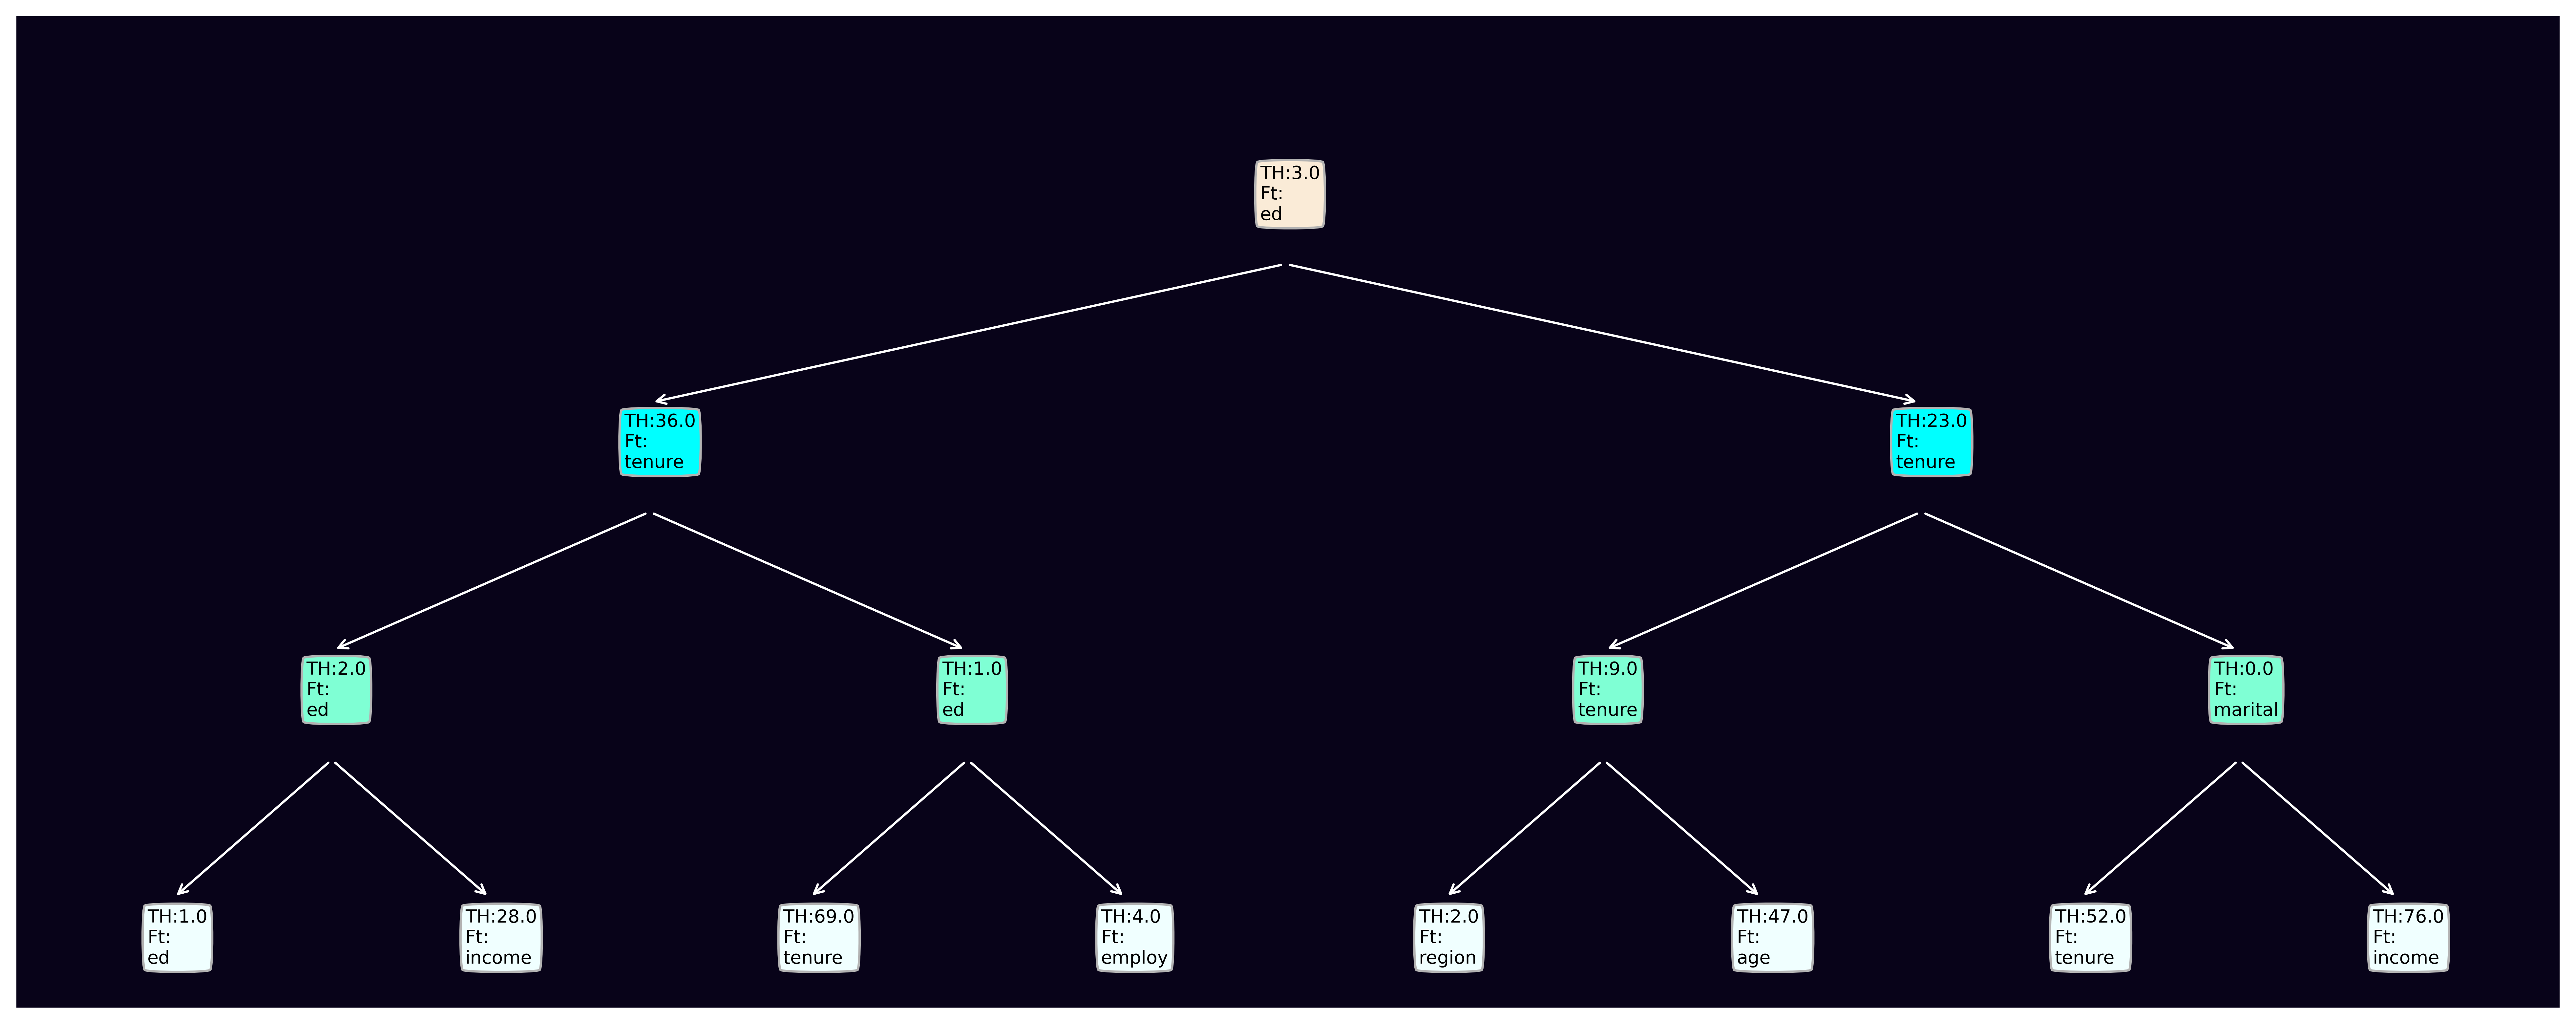

In [17]:
#import pydotplus
#from sklearn.tree import DecisionTreeClassifier
#from IPython.display import Image
#from sklearn import tree


## Write your own code to visualize tree with 4 levels
# Did not use any extra lib for visualise
dec_tree.visualize_tree(column_names , max_depth=4)


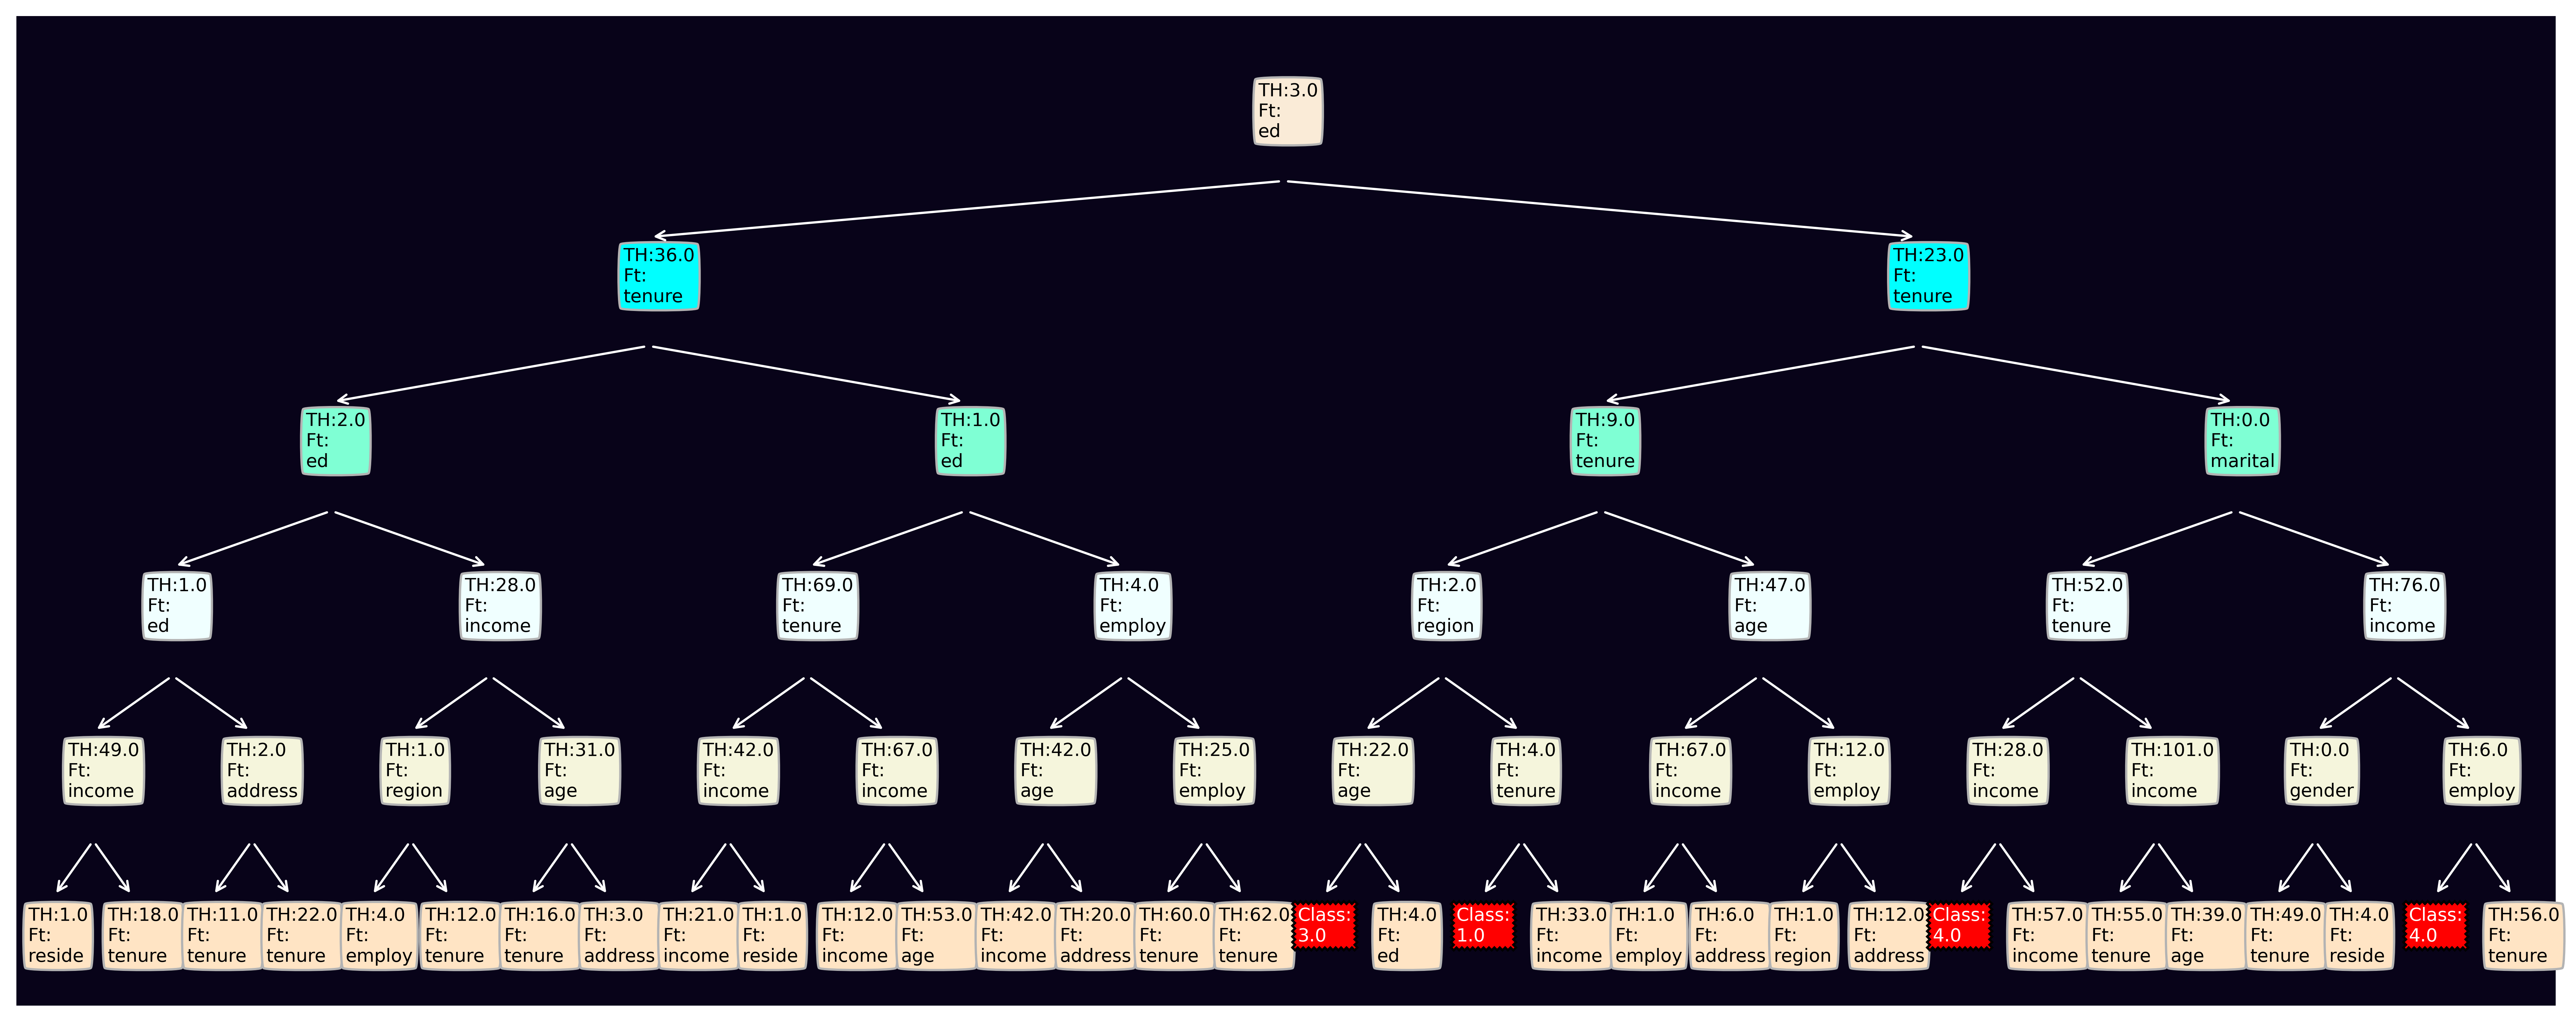

In [18]:
# 6 levelde sınıf da geliyor . 
dec_tree.visualize_tree(column_names , max_depth=6)


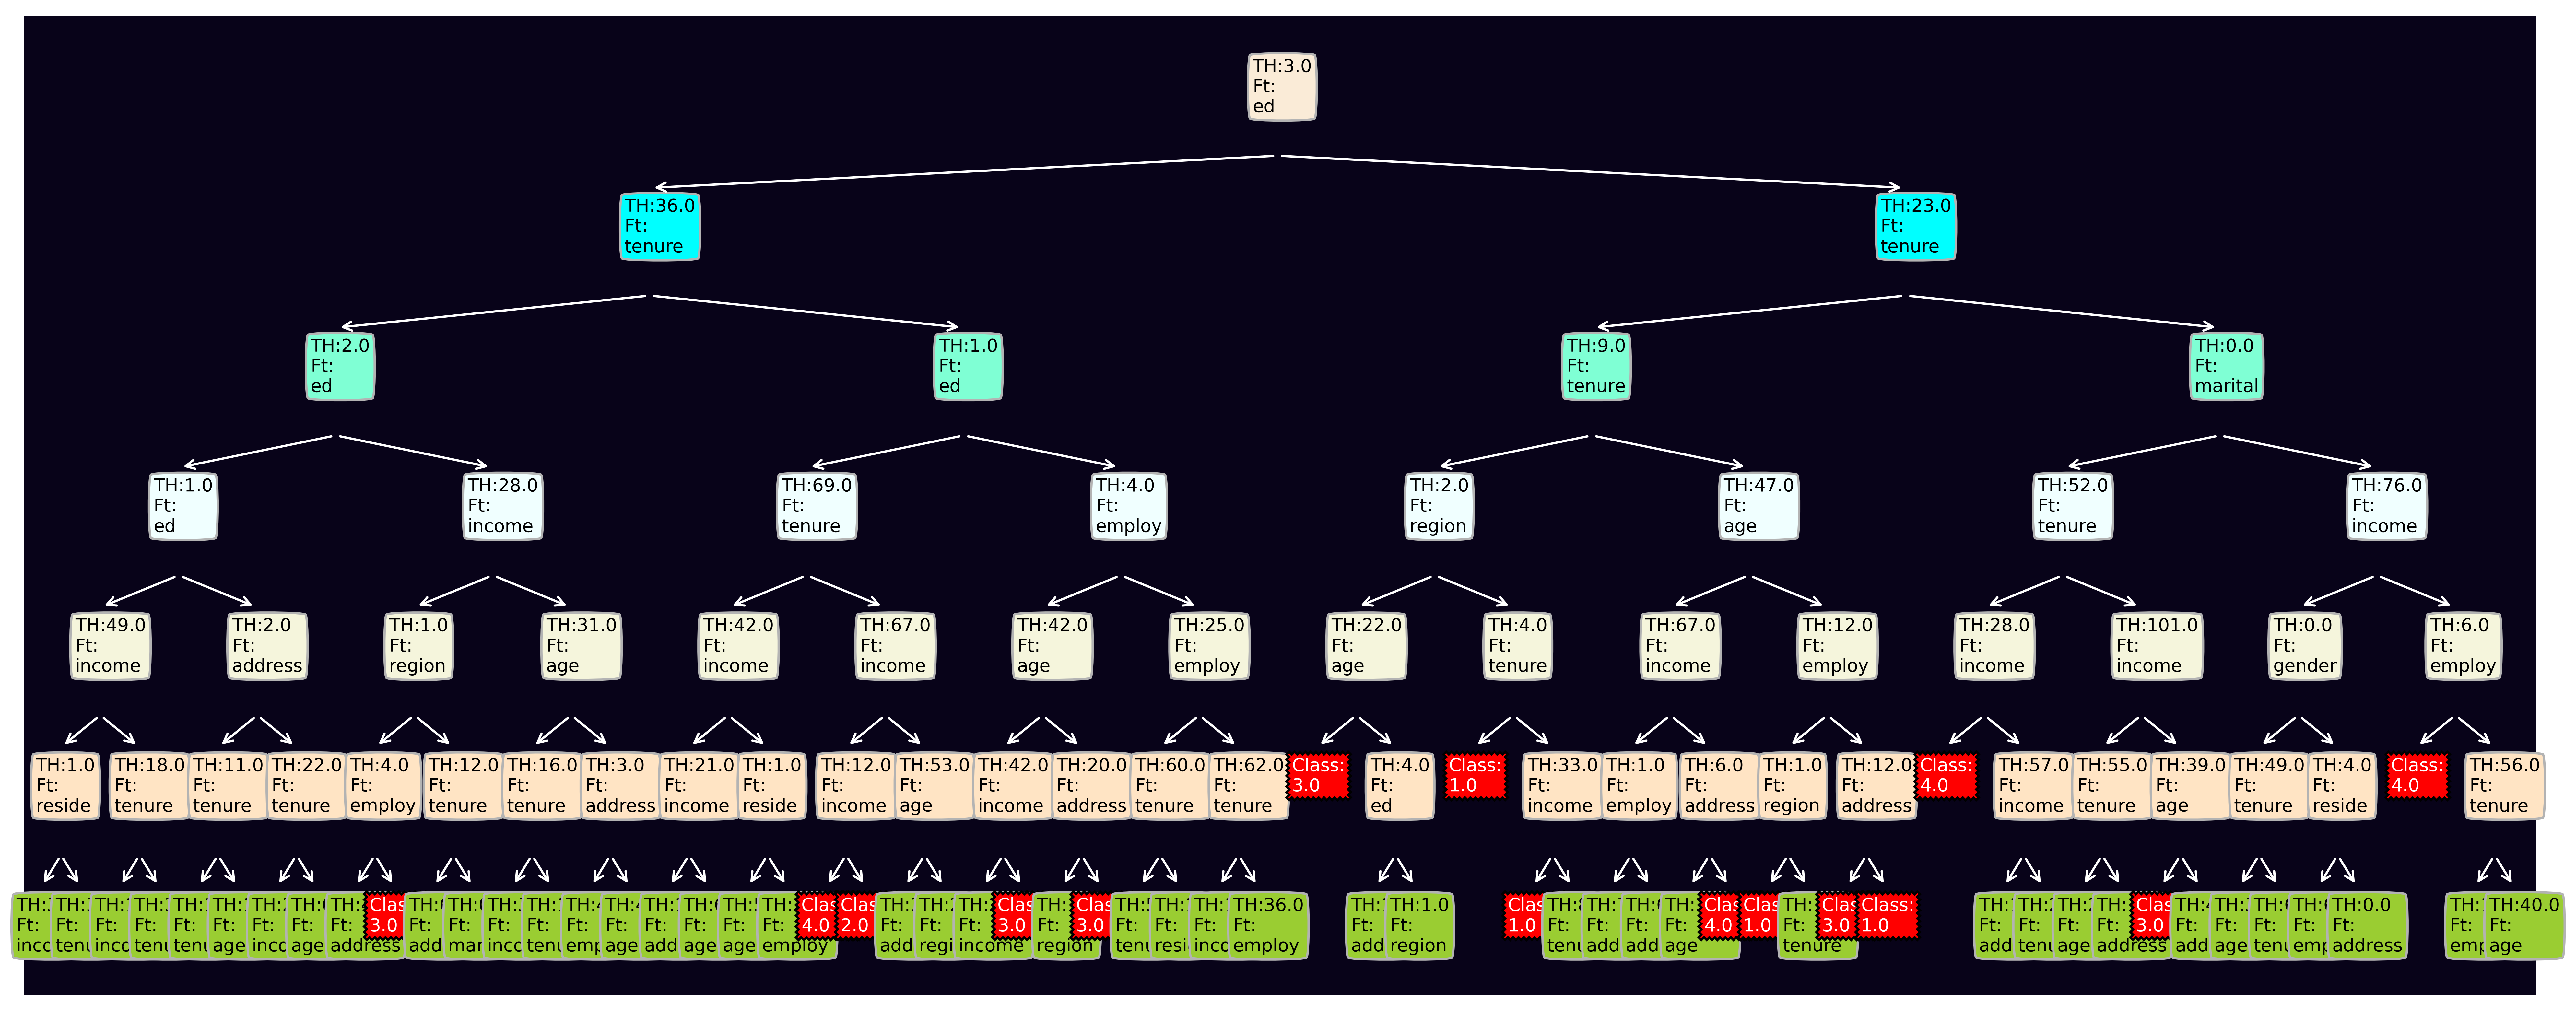

In [19]:
# 7 level
dec_tree.visualize_tree(column_names , max_depth=7)